In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt

plt.style.use('./deeplearning.mplstyle')

import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax

np.set_printoptions(precision=2)

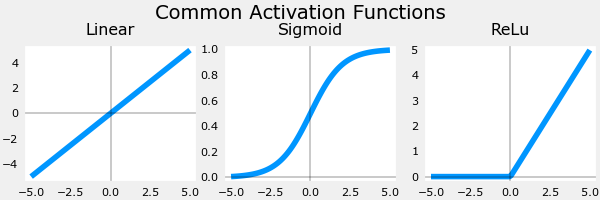

In [4]:
plt_act_trio()

In [5]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """
    ### START CODE HERE ###
    ez = np.exp(z)
    az = ez / np.sum(ez)

    print(ez)
    ### END CODE HERE ###
    return az


z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")
# BEGIN UNIT TEST
test_my_softmax(my_softmax)
# END UNIT TEST

[ 2.72  7.39 20.09 54.6 ]
my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
[ 2.72  7.39 20.09 54.6 ]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 All tests passed.


[ 2.72  7.39 20.09 54.6 ]


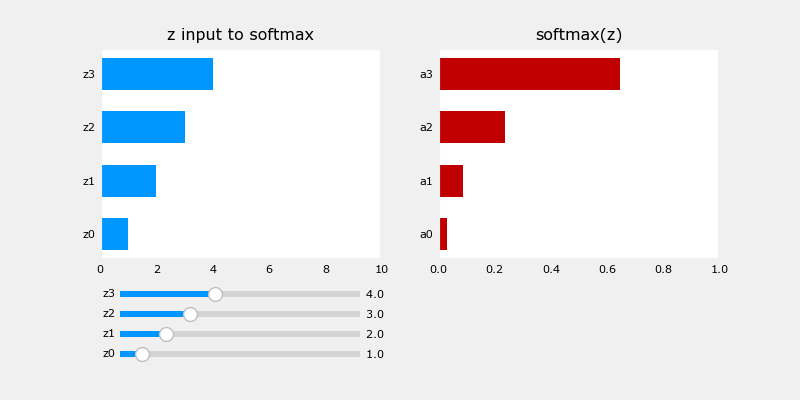

In [6]:
plt.close("all")
plt_softmax(my_softmax)

In [7]:
X, y = load_data()
print(X.shape)
print(y.shape)
print(X[0])
print(y[0])

(5000, 400)
(5000, 1)
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-01  2.7

In [8]:
print('The first element of y is: ', y[0, 0])
print('The last element of y is: ', y[-1, 0])

The first element of y is:  0
The last element of y is:  9


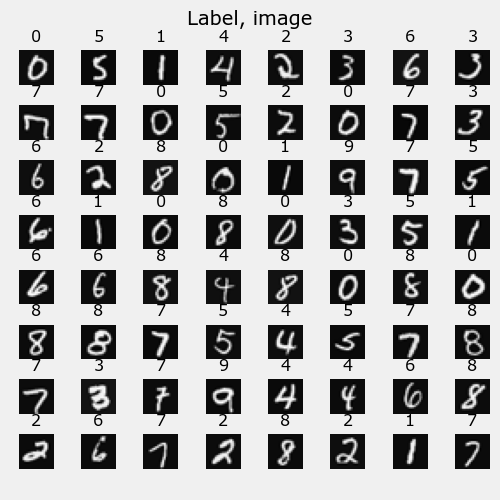

In [9]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# you do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [10]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        ### START CODE HERE ###
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation="relu"),
        Dense(units=15, activation="relu"),
        Dense(units=10, activation="linear"),
        ### END CODE HERE ###
    ], name = "my_model"
)

In [11]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [12]:
# BEGIN UNIT TEST
test_model(model, 10, 400)
# END UNIT TEST

All tests passed!


In [13]:
[layer1, layer2, layer3] = model.layers
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [24]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,
    y,
    epochs=100
)

Epoch 1/100
157/157 [==============================] - 1s 2ms/step - loss: 0.0226
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 8/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 9/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 10/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 11/100
157/157 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 12/100
157/157 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 13/100


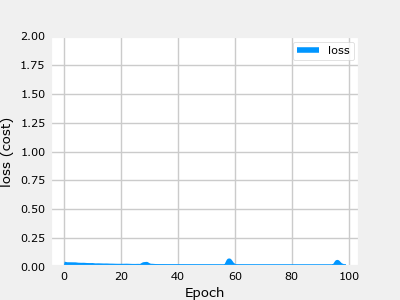

In [25]:
plot_loss_tf(history)

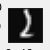

1/1 [==============================] - 0s 45ms/step
 predicting a Two: 
[[-29.38  10.98  16.94   4.29 -16.74 -15.19 -16.72  12.35  -1.69 -16.55]]
 Largest Prediction index: 2


In [26]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 17ms/step


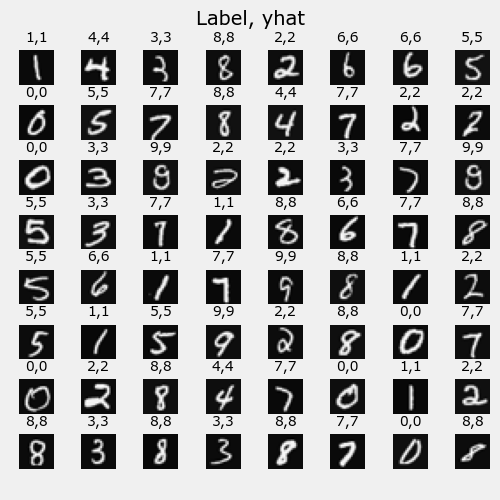

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [28]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

157/157 [==============================] - 0s 1ms/step
no errors found
0 errors out of 5000 images
